In [3]:
import numpy as np

In [4]:
# for a two layer model assuming Reflectors are Horizontal
def NMO_correction(V, H, offset, delta_i=0.00001):
    v1,v2=V[0],V[1]
    h1,h2=H[0],H[1]
    
    low = delta_i
    high = 1.57 - delta_i # (pi/2) - delta_i
    while low<=high:
        i1 = (low+high)/2
        
        # TIR case, avoiding Critical Angle case
        if np.sin(i1) >= v1/v2:
            # we have to decrease i1
            high = i1 - delta_i
            continue
        
        i2 = np.arcsin((v2/v1) * np.sin(i1))
        
        x1 = h1 * np.tan(i1)
        x2 = h2 * np.tan(i2)
        X = x1 + x2
        
        if X - offset > 1:
            # X is large --> i1 is large
            high = i1 - delta_i
        
        elif offset - X > 1:
            # X is small --> i1 is small
            low = i1 + delta_i
        
        else:
            # |X - offset| <= 1
            
            # calculate path length
            l1 = h1 / np.cos(i1)
            l2 = h2 / np.cos(i2)
            
            t1 = l1/v1
            t2 = l2/v2
            
            # Two-way travel time for given offset
            Tx = 2*(t1+t2)
            # Two-way travel time for zero offset
            T0 = 2*(h1/v1 + h2/v2)
            delta_T = Tx - T0
            
            stacking_velocity = np.sqrt((offset**2)/(Tx**2 - T0**2))
            return (delta_T, stacking_velocity)

In [5]:
# Given Values
V = [1500,2000]
H = [750,1000]
offsets = [1000,2500,5000]

stacking_velocities = []
delta_T_nmo = []
for offset in offsets:
    ans = NMO_correction(V,H,offset)
    delta_T_nmo.append(ans[0])
    stacking_velocities.append(ans[1])

In [6]:
stacking_velocities

[886.495927444185, 898.9405055212048, 922.0056019728715]

In [7]:
delta_T_nmo

[0.29618530345961425, 1.4255289266989335, 3.780008741501235]

Matplotlib is building the font cache; this may take a moment.


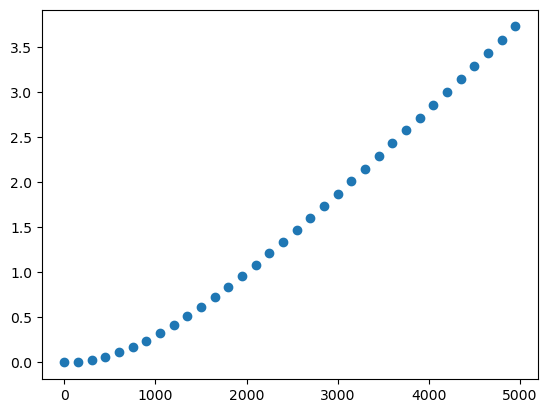

In [8]:
# Lets see how NMO correction and Stacking Velocities Varies on Different values of Offsets for the same two layer model
# lets offsets = 0, 150, 300, 450, . . . , 5000
V = [1500,2000]
H = [750,1000]
offsets = [x for x in range(0,5000,150)]
stacking_velocities = []
delta_T_nmo = []

for offset in offsets:
    ans = NMO_correction(V,H,offset)
    delta_T_nmo.append(ans[0])
    stacking_velocities.append(ans[1])

import matplotlib.pyplot as plt
plt.scatter(offsets,delta_T_nmo)
plt.show()

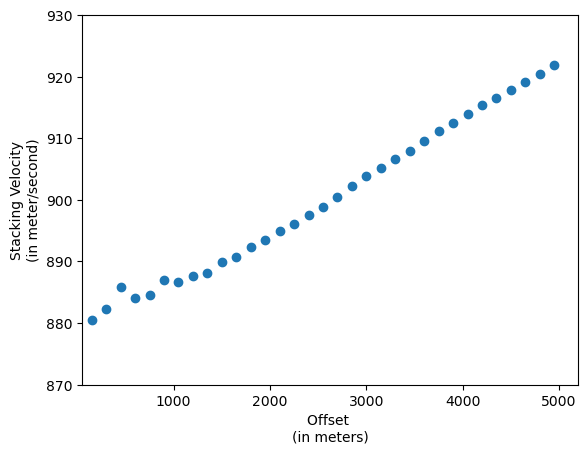

In [9]:
plt.scatter(offsets,stacking_velocities)
plt.xlim(50,)
plt.ylim(870,930)
plt.xlabel('Offset \n(in meters)')
plt.ylabel('Stacking Velocity\n(in meter/second)')
plt.show()